In [3]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

#Query to join the test_types tables with test_summary_unified_reporting table by ID and test type ID .
df_columbia_1h_2025 = pd.read_sql("select * from auto.vi_test_summary_unified_reporting tsr join md2.test_types tt using (test_type_id) where tsr.collection_set_id = 12698 and tsr.test_type_id = 20;",
                                      con=os.getenv('RSR_SVC_CONN'))

df_columbia_1h_2025.head()

,test_type_id,product_period_id,product_period,collection_set_id,collection_set,test_event_id,device_event_id,collection_area_id,collection_type_id,carrier_id,...,task_speed_median,task_speed_5th_percentile,task_speed_95th_percentile,video_stall_severity,name,source_type,insert_time,update_time,friendly_name,lma_name
0,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230341,6797308080,165,1,478,...,574.281720,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD
1,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230376,6797312867,165,1,3,...,869.578682,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD
2,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230603,6797308537,165,1,478,...,729.173401,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD
3,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230605,6797309003,165,1,478,...,106.847759,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD
4,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230630,6797311723,165,1,4,...,429.820103,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD


In [4]:
carrier_color_dict = {
                        'Verizon': '#b00000',
                        'AT&T': '#067ab4',
                        'T-Mobile': '#e60076',
                        'Sprint': '#ffaa00',
                        'Dish': '#3F3F3F',
                        'EE': '#2e9b9d',
                        'O2': '#010066',
                        'Three': '#000000',
                        'Vodafone': '#f80000',
                        'O2 UK': '#010066',
                        'Three UK': '#000000',
                        'Vodafone UK': '#f80000',
                        'Sunrise': '#d0606f',
                        'Swisscom': '#5b92cc',
                        'Salt': '#56bf83',
                        'ODIDO': '#FF7621',
                        'KPN': '#FFBB00',
                        'Vodafone NL': '#f80000',
                        'KT': '#FF7621',
                        'SK Telecom': '#FFBB00',
                        'LG U+': '#f80000',
                     }

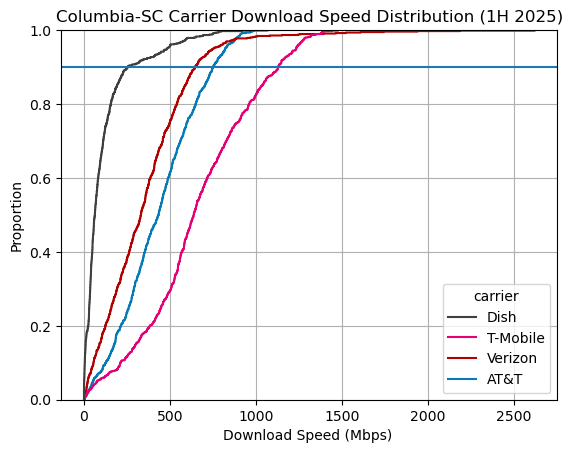

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_columbia_1h_2025

sns.ecdfplot(data=df, x="task_speed_median", hue="carrier", palette=carrier_color_dict)
plt.title("Columbia-SC Carrier Download Speed Distribution (1H 2025)")
plt.xlabel("Download Speed (Mbps) ")
plt.axhline(0.9)
plt.grid(True)
plt.savefig("Columbia-SC Carrier Download Speed Distribution (1H 2025)", format="png")
plt.show()

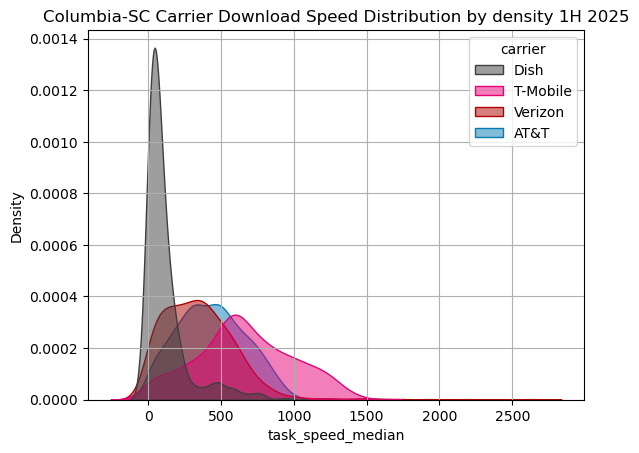

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_columbia_1h_2025

sns.kdeplot(data=df, x="task_speed_median", hue="carrier", palette=carrier_color_dict, fill=True, alpha=0.5)
plt.title("Columbia-SC Carrier Download Speed Distribution by density 1H 2025")
plt.grid(True)
plt.savefig("Columbia-SC Carrier Download Speed Distribution by density(1H 2025)", format="png")
plt.show()

In [7]:
import plotly.express as px
import kaleido

if not os.path.exists("images"):
    os.mkdir("images")

df = df_columbia_1h_2025

fig = px.box(df, x= "carrier", y= "task_speed_median",
             points= "outliers",
             color= "carrier",
             color_discrete_map=carrier_color_dict,
             notched= True,
             title= " Columbia-SC Carrier Download Speed Distribution (1H 2025)",
             hover_data=["product_period"])
# Add y-axis title
fig.update_layout(
    yaxis_title="Task Speed Median (Mbps)"
)
# Save the plot as a PNG file
fig.write_image("images/Columbia_SC_Carrier_Download_Speed_Distribution_1H_2025.png")


fig.show()

In [8]:
import plotly.express as px
import pandas as pd
import kaleido

if not os.path.exists("images"):
    os.mkdir("images")

df = df_columbia_1h_2025

# Get the list of unique carriers
carriers = df['carrier'].unique()

# Loop through each carrier and create a box plot
for carrier in carriers:
    df_carrier = df[df['carrier'] == carrier]

    fig = px.box(df_carrier, x="carrier", y="task_speed_median",
                 points="outliers",
                 color="carrier",
                 color_discrete_map=carrier_color_dict,
                 notched=True,
                 title=f"{carrier} - Columbia-SC Carrier Download Speed Distribution (1H 2025)",
                 hover_data=["product_period"])

    # Add y-axis title
    fig.update_layout(
        yaxis_title="Task Speed Median (Mbps)"
    )

    # Save the plot as a PNG file
    fig.write_image(f"images/{carrier}_Columbia_SC_Carrier_Download_Speed_Distribution_1H_2025.png")

    # Show the plot
    fig.show()